In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans

C:\Users\preksha\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
data = pd.read_csv("drama.csv")
sentences = [] 
for s in data['article_text']:
    sentences.append(sent_tokenize(s))
    
sentences=[y for x in sentences for y in x]

In [4]:
corpus=[]
corpus=sentences

In [5]:
len(corpus)

42

In [6]:

(corpus[0:5])

['In Drama every world is a stage.',
 'Everyone on the stage is doing drama .',
 'Every world is a  stage and is commonly said in drama.',
 'The world commonly revolves around Drama and Stage.',
 'Drama in every world leads to removal of stage fear.']

In [7]:
corpus[0]

'In Drama every world is a stage.'

In [8]:
    
    
#Count Vectoriser then tidf transformer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X= vectorizer.fit_transform(corpus) 
len(vectorizer.get_feature_names())

#print(X.toarray())     


225

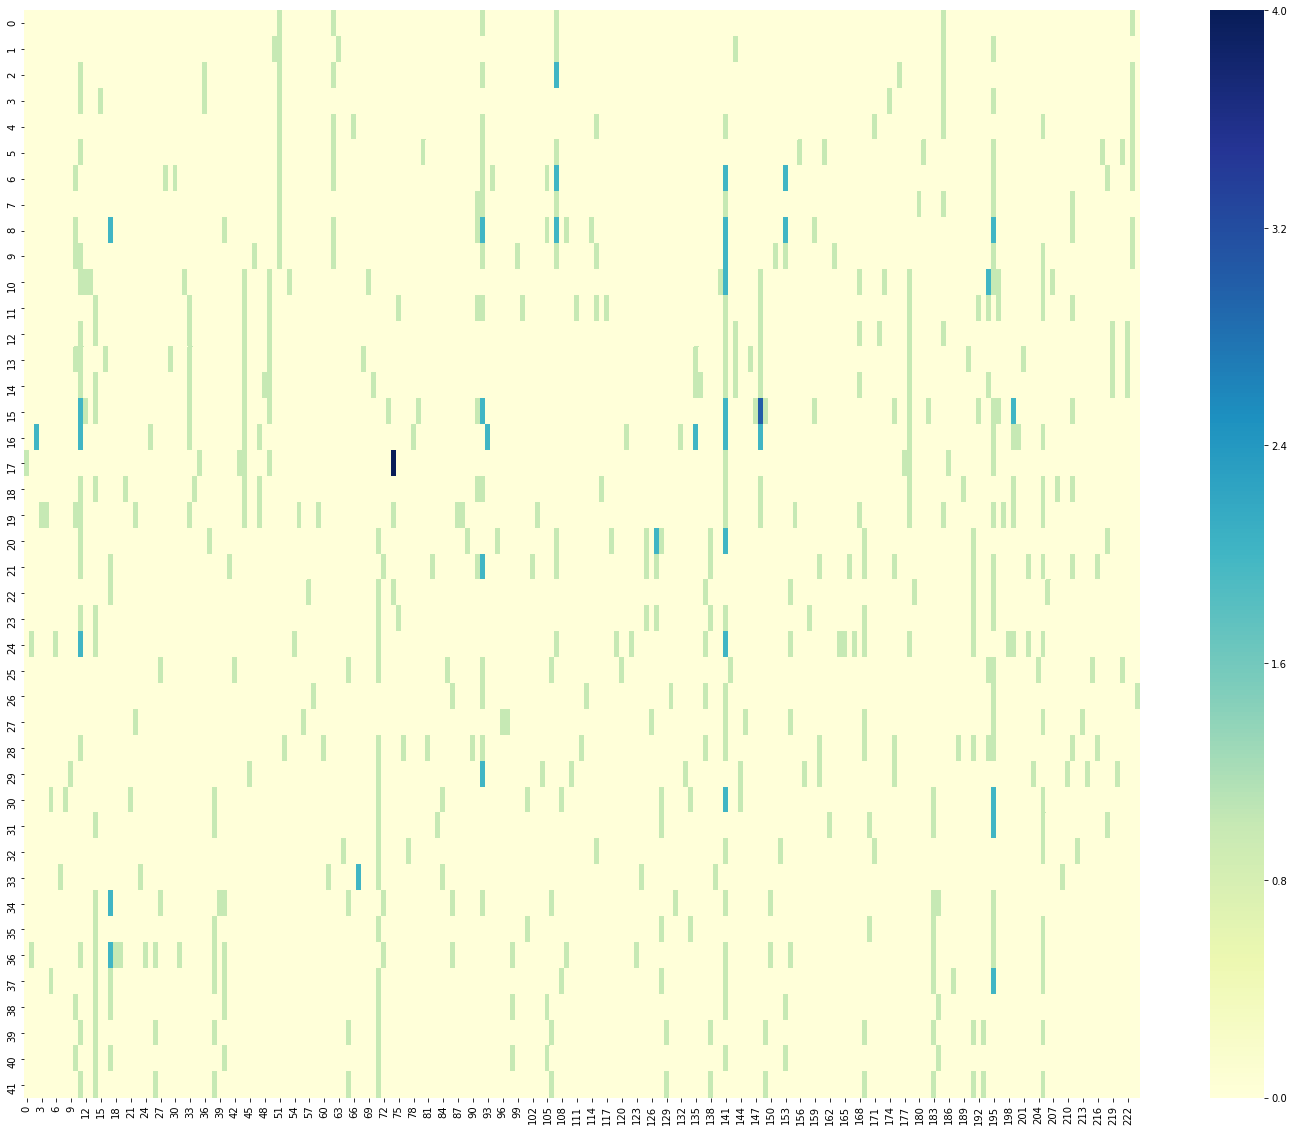

In [9]:
f,ax = plt.subplots(figsize=(25, 20))
A=X.toarray()

sns.heatmap(A, cmap="YlGnBu")

plt.show()

In [10]:

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )                        


(42, 225)


In [11]:

from sklearn.cluster import KMeans

num_clusters = 3 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()


In [12]:

idea={'Idea':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['Idea','Cluster']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(type(frame['Cluster'])) #Print the counts of doc belonging to each cluster.



                                                Idea  Cluster
1                   In Drama every world is a stage.        1
1             Everyone on the stage is doing drama .        1
1  Every world is a  stage and is commonly said i...        1
1  The world commonly revolves around Drama and S...        1
1  Drama in every world leads to removal of stage...        1
1  Every where in the world Drama is performed wi...        1
1  Character building is an integral part of Dram...        1
1   Setting of the Stage is very important in drama.        1
1  Language of the play in Drama is very importan...        1
1  Drama leads to overall devlopment of an indivi...        1
2  The Discipline , Dedication, Organization and ...        2
2  Theatre leads to key four terms that are very ...        2
2  Qualities required while working on stage are ...        2
2  While working on field an artist must take car...        2
2  Qualities that a Director must need while work...        2
2  In 